# **Question -1**

Perceptron is single neuron concist of (input, weight and bias). In our computaion we are taking w0 = 0, w1 =1 and w2=1 where as learning rate is 1 for faster convergence.

Starting value of w1 :1
Starting value of w2 :1
new w1 :0.9
new w2 :0.0
new w1 :0.9
new w2 :-0.5
new w1 :0.9
new w2 :-0.5
Total steps taken to converge are : 3
Final value of w1 :0.9
Final value of w2 :-0.5


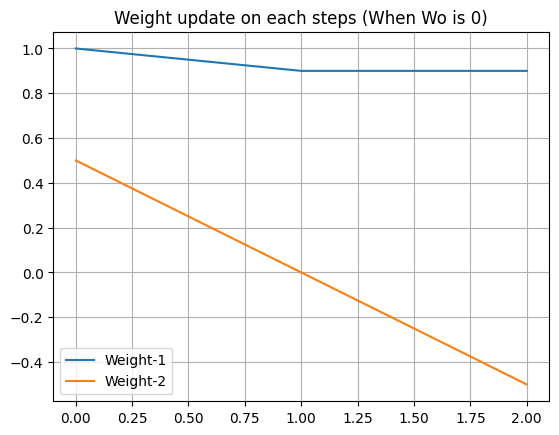

In [ ]:
import sklearn.linear_model as sk
import random
import matplotlib.pyplot as plt

#Reading dataset as given in question
x1 = [1,-1,0,0.1,0.2,0.9]
x2 = [1,-1,0.5,0.5,0.2,0.5]
out = [1,-1,-1,-1,1,1]

#Defining Activation function
def actvationFunction(value):
  if(value>=0):
    return 1
  else:
    return -1

lr = 1 #learning rate =1

#initialize weights
w0 = 0
w1 = 1
w2 = 1

flag =False
count = 1
print("Starting value of w1 :" +str(w1))
print("Starting value of w2 :" +str(w2))

mapW1 = []
mapW2 = []
t=0
while(flag==False): #loop until converge
  count= count +1
  flag =True
  for i in range(len(x1)):
    yin = w0 + w1*x1[i] + w2*x2[i]
    output = actvationFunction(yin)
    if (output!= out[i]):
      #print(output)
      #update weight and bias
      t = out[i]
      dw1 = lr*t*x1[i]
      dw2 = lr*t*x2[i]
      db = lr*t
      w1 = w1 +dw1
      w2 = w2 +dw2 
      mapW1.append(w1)
      mapW2.append(w2)
      flag = False
  print("new w1 :" +str(w1))
  print("new w2 :" +str(w2))

def predict(k,m):
  c = w1*k+w2*m+ w0
  print(actvationFunction(c))
  return actvationFunction(c)
  

print("Total steps taken to converge are : "+str(count-1))
print("Final value of w1 :" +str(w1))
print("Final value of w2 :" +str(w2))

plt.plot(mapW1,label='Weight-1') 
plt.plot(mapW2, label='Weight-2')
plt.title("Weight update on each steps (When Wo is "+str(w0)+")")
plt.grid()
plt.legend()
plt.show()

##Uncomment the folloing code to check prediction

# print("pridiction")
# for j in range(6):
#   predict(x1[j],x2[j])



## **Code for decision boundry for perceptron for calculated weights**

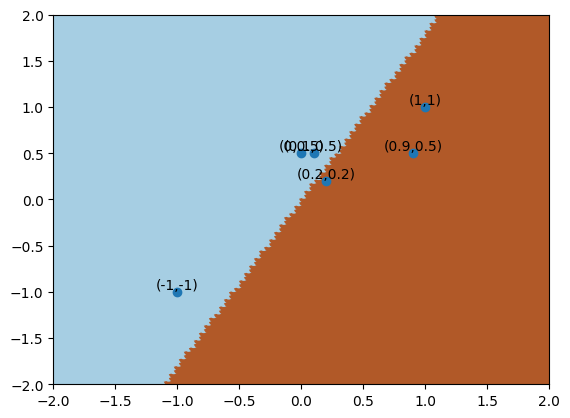

In [ ]:

# Define the perceptron weights and bias
w = np.array([w1, w2])
b=0

# Define a grid of points to plot
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute the predicted class for each point on the grid
Z = np.sign(np.dot(grid, w) + b)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the grid points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(grid[:, 0], grid[:, 1], c=Z.flatten(), cmap=plt.cm.Paired)
plt.scatter(x1,x2)
for i in range(6):
    plt.annotate(("("+str(x1[i])+","+str(x2[i])+")"), (x1[i], x2[i]),va='bottom', ha='center')
plt.show()



# **Question 2** 

(Classification of Gurumukhi digits)


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from google.colab import drive
drive.mount("/content/gdrive")
from  matplotlib import pyplot as plt


img_folder = '/content/gdrive/My Drive/MachineLearningFractal-3/Gurmukhi Dataset/train/'
IMG_HEIGHT = 32
IMG_WIDTH = 32

# creating dataset by given images (reading images from google drive)
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for folder in os.listdir(img_folder):
      for file in os.listdir(os.path.join(img_folder, folder)):
        image_path= os.path.join(img_folder, folder,  file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2GRAY)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
        class_name.append(folder)

    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset(img_folder)

x_train = np.array(img_data).flatten #flatten the data for input layer
y_train = np.array(class_name).reshape(-1)

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))] #getting target classes into numpy array

#initailizing sequential model with output size 10 (we have 10 classes)
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='softmax')
        ])


model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Reshaping input data to input layer size
x_train =  np.array(img_data, np.float32).reshape(-1, 32, 32, 1)

history= model.fit(x_train, y=np.array(list(map(int,target_val)), np.float32), epochs=150)

(np.array(img_data, np.float32)).shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/150
32/32 [==============================] - 0s 2ms/step - loss: 2.0479 - accuracy: 0.3390
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 1.0483 - accuracy: 0.7810
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.8780
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.9130
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.9340
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.9430
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.9440
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9500
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.26

(1000, 32, 32)

6/6 [==============================] - 0s 7ms/step - loss: 0.1857 - accuracy: 0.9494
Model Accuracy on evaluation: 0.949438214302063
Model Loss on evaluation: 0.18570025265216827


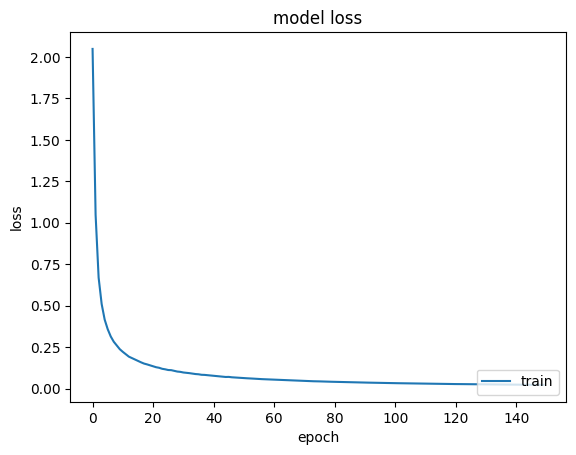

In [ ]:
# Validation of model

img_data_test, class_name_test = create_dataset(r'/content/gdrive/My Drive/MachineLearningFractal-3/Gurmukhi Dataset/val/')
x_test = np.array(img_data_test,np.float32).reshape(-1, 32, 32, 1)
y_test = np.array(class_name_test).reshape(-1)

target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_val_test=  [target_dict[class_name_test[i]] for i in range(len(class_name_test))]
historyEval = model.evaluate(x_test, y=np.array(list(map(int,target_val_test)), np.float32))

print("Model Accuracy on evaluation: "+str(historyEval[1]))
print("Model Loss on evaluation: "+str(historyEval[0]))
plt.plot(history.history['loss'])
#plt.plot(historyEval.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')

1/1 [==============================] - 0s 39ms/step
9


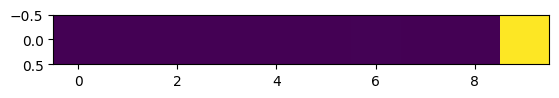

In [ ]:
img_data_test, class_name_test = create_dataset(r'/content/gdrive/My Drive/MachineLearningFractal-3/Gurmukhi Dataset/val/')
x_test = np.array(img_data_test,np.float32).reshape(-1, 32, 32, 1)
y_test = np.array(class_name_test).reshape(-1)

target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_val_test=  [target_dict[class_name_test[i]] for i in range(len(class_name_test))]
model.evaluate(x_test, y=np.array(list(map(int,target_val_test)), np.float32))
testImg =  x_test[50].reshape(-1, 32, 32, 1)
#plt.imshow(x_test[50])
#pridiction
plt.imshow(model.predict(testImg))

### **Question - 3 part-1**

Mounted at /content/gdrive


100%|██████████| 1000/1000 [07:19<00:00,  2.28it/s]


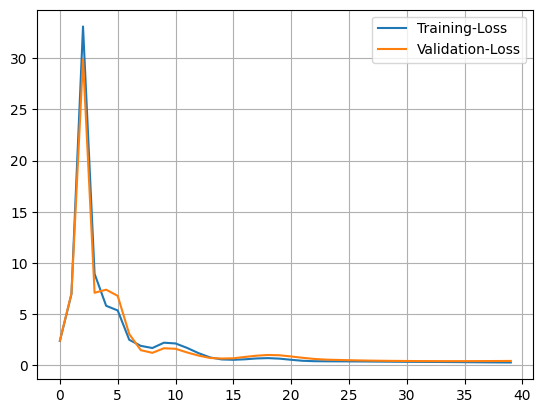

0.84


In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from google.colab import drive
# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, BatchNorm2d
from torch.optim import Adam
drive.mount("/content/gdrive")


img_folder = '/content/gdrive/My Drive/MachineLearningFractal-3/charts/train_val/'
labelFile = '/content/gdrive/My Drive/MachineLearningFractal-3/charts/train_val.csv'

def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
      for file in os.listdir(os.path.join(img_folder, dir1)):
        image_path= os.path.join(img_folder, dir1,  file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2GRAY)
        #image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
        class_name.append(dir1)
    return img_data_array, class_name

trainLable = pd.read_csv(labelFile) #Load csv file from folder for classes

# loading training images
train_img = []
for img_name in tqdm(trainLable['image_index']):
    image_path = img_folder + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = img.astype('float32')
    img /= 255 # normalizing the pixel values
    train_img.append(img)

train_x = np.array(train_img)# converting the list to numpy array

train_y = trainLable['type'].values #target defination
train_x.shape

# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)
encoder = preprocessing.LabelEncoder()

# converting training images into torch format
train_x = train_x.reshape(800, 1, 128, 128)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = encoder.fit_transform(train_y)

train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

train_x.shape, train_y.shape # shape of training data

# converting validation images into torch format
val_x = val_x.reshape(200, 1, 128, 128)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = encoder.fit_transform(val_y)

val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

class CNNModel(Module):   
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 32 * 32, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


model = CNNModel()
optimizer = Adam(model.parameters(), lr=0.07) # defining the optimizer and learning rate

criterion = CrossEntropyLoss() # defining the loss function
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

def train(epoch):
    model.train()
    tr_loss = 0
    x_train, y_train = Variable(train_x), Variable(train_y)
    y_train = y_train.long()
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    y_val = y_val.long()
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()

# empty list to stor losses
train_losses = []
val_losses = []
# training the model
for epoch in range(40):
    train(epoch)

# plotting the loss
with torch.no_grad():    
    plt.plot(train_losses, label='Training-Loss')
    plt.plot(val_losses, label='Validation-Loss')
    plt.grid()
    plt.legend()
    plt.show()

# prediction for training set
with torch.no_grad():
    output = model(train_x)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

# prediction for validation set
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
print(accuracy_score(val_y, predictions))



# **Question - 3 Part 2**

I used public architecture of Alexnet and Build all the layers with given infpri

ntormation


In [ ]:
#load packages
import numpy as np
import os
import cv2
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd

from  matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
# for creating validation set
from sklearn.model_selection import train_test_split

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
imageShape = (227,227,3)
np.random.seed(1000) # initialte empty model

model = Sequential()
#1st conv layer
model.add(Conv2D(filters=96,input_shape = imageShape,kernel_size=(11,11),strides=(4,4), padding ='valid'))
model.add(Activation('relu'))

#max pooling layer

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2), padding ='valid'))

#2nd conv layer
model.add(Conv2D(filters=256,input_shape = imageShape,kernel_size=(5,5),strides=(1,1), padding ='valid'))
model.add(Activation('relu'))

#max pooling layer

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2), padding ='valid'))

#3rd conv layer
model.add(Conv2D(filters=384,input_shape = imageShape,kernel_size=(3,3),strides=(1,1), padding ='valid'))
model.add(Activation('relu'))

#4th conv layer
model.add(Conv2D(filters=384,input_shape = imageShape,kernel_size=(3,3),strides=(1,1), padding ='valid'))
model.add(Activation('relu'))

#5th conv layer
model.add(Conv2D(filters=256,input_shape = imageShape,kernel_size=(5,5),strides=(1,1), padding ='valid'))
model.add(Activation('relu'))

#max pooling layer

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2), padding ='valid'))


#before passing to FC layer, flatten the data

model.add(Flatten())

#1st FC layer
model.add(Dense(4096,input_shape = (227*227*3,)))
model.add(Activation('relu'))

#adding dropout, prevents overfitting
model.add(Dropout(0.4))

#1nd FC layer
model.add(Dense(4096))
model.add(Activation('relu'))
#adding dropout, prevents overfitting
model.add(Dropout(0.4))

#output layer
model.add(Dense(5))
model.add(Activation('softmax'))

#model.summary()

model.compile(loss = keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])



img_folder = '/content/gdrive/My Drive/MachineLearningFractal-3/charts/train_val/'
labelFile = '/content/gdrive/My Drive/MachineLearningFractal-3/charts/train_val.csv'

train = pd.read_csv(labelFile)
#test = pd.read_csv('Chart/test.csv')

print(train.head())
def append_ext(fn):
    return str(fn)+".png"


train["image_index"]= train["image_index"].apply(append_ext)

#sample_submission = pd.read_csv('Chart/prediction.csv')

train.head()
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

train_generator=datagen.flow_from_dataframe(
  dataframe=train,
  directory=img_folder,
  x_col="image_index",
  y_col="type",
  subset="training",
  batch_size=1000,
  seed=42,
  shuffle=True,
  class_mode="categorical",
  target_size=(227,227))

train_x, train_y = next(train_generator)

print(train_x.shape)
print(train_y.shape)
model.fit(train_x,train_y , epochs=100)



   image_index              type
0            0  vbar_categorical
1            1  vbar_categorical
2            2  vbar_categorical
3            3  vbar_categorical
4            4  vbar_categorical
Found 750 validated image filenames belonging to 5 classes.
(750, 227, 227, 3)
(750, 5)
Epoch 1/100
24/24 [==============================] - 75s 3s/step - loss: 1.5805 - accuracy: 0.2880
Epoch 2/100
24/24 [==============================] - 70s 3s/step - loss: 1.2117 - accuracy: 0.4253
Epoch 3/100
24/24 [==============================] - 69s 3s/step - loss: 1.0125 - accuracy: 0.4973
Epoch 4/100
24/24 [==============================] - 72s 3s/step - loss: 1.0551 - accuracy: 0.5213
Epoch 5/100
24/24 [==============================] - 70s 3s/step - loss: 0.9241 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 70s 3s/step - loss: 0.8466 - accuracy: 0.5880
Epoch 7/100
24/24 [==============================] - 72s 3s/step - loss: 0.7928 - accuracy: 0.6053
Epoch 8/100
24/24 [==